<b>Garnett Grant</b>

<b>Student Number: 301188923</b>

## Exercise #1 Pandas

<h4>Init from dict</h4>

In [51]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#1.	Create a new dictionary, name it your firstname where firstname _fruits is your first name.
garnett_fruits = {}
garnett_fruits


{}

In [28]:
#2. Add four items to the dictionary with names of your favorite fruits as keys and the respective color as values.
garnett_fruits.update({
    "Ackee":"Yellow",
    "Mango":"Yellow",
    "Pineapple":"Yellow",
    "Avacado":"Green"
})
garnett_fruits

{'Ackee': 'Yellow',
 'Mango': 'Yellow',
 'Pineapple': 'Yellow',
 'Avacado': 'Green'}

In [29]:
#3.	Convert the dictionary into a pandas series named firstname_f.
garnett_f = pd.Series(garnett_fruits)
garnett_f

Ackee        Yellow
Mango        Yellow
Pineapple    Yellow
Avacado       Green
dtype: object

In [30]:
#4.	Print out the second and third items.
garnett_f[1], garnett_f[2]

('Yellow', 'Yellow')

In [36]:
#5.	Create a sub series named firstname_f2 containing the second and third items.
garnett_f2 = pd.Series([garnett_f[1], garnett_f[2]])
garnett_f2

0    Yellow
1    Yellow
dtype: object

In [37]:
# 6. Print out from the sub series the last item using iloc.
garnett_f2.iloc[-1]

'Yellow'

<h4>Handling Time</h4>

In [39]:
# 1. Create a list containing four  rainfall amounts  of values 10, 23,24,30 name the list firstname_amounts.
garnett_amounts = [10,23,24,30]

In [38]:
#2.	Using pandas create a date_range for todays date/time (you can set any time) with four time intervals.
dates = pd.date_range('2024/01/27 11:00am', periods=4, freq='H')
dates

DatetimeIndex(['2024-01-27 11:00:00', '2024-01-27 12:00:00',
               '2024-01-27 13:00:00', '2024-01-27 14:00:00'],
              dtype='datetime64[ns]', freq='H')

In [53]:
#3.	Create a series that combines both the list and date range name it firstname_rainfallamounts_today.
garnett_rainfall_amounts_today = pd.Series(garnett_amounts, dates)
garnett_rainfall_amounts_today

2024-01-27 11:00:00    10
2024-01-27 12:00:00    23
2024-01-27 13:00:00    24
2024-01-27 14:00:00    30
Freq: H, dtype: int64

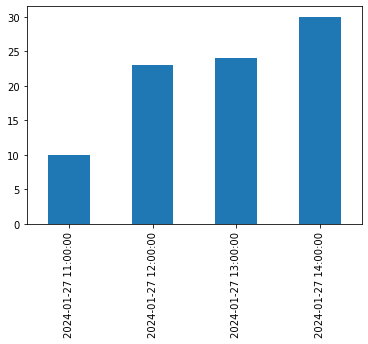

In [54]:
#4.	Plot as bar chart.
garnett_rainfall_amounts_today.plot(kind="bar")
plt.show()

<h4>Pandas Multi-Indexing</h4>
<blockquote>Make a copy of the dataframe d5 and name it fristname_d5, carryout the following:
</blockquote>

In [55]:
d5 = pd.DataFrame(
  {
    ("public", "birthyear"):
        {("Paris","alice"):1985, ("Paris","bob"): 1984, ("London","charles"): 1992},
    ("public", "hobby"):
        {("Paris","alice"):"Biking", ("Paris","bob"): "Dancing"},
    ("private", "weight"):
        {("Paris","alice"):68, ("Paris","bob"): 83, ("London","charles"): 112},
    ("private", "children"):
        {("Paris", "alice"):np.nan, ("Paris","bob"): 3, ("London","charles"): 0}
  }
)

In [72]:
#1.	print out a dataframe containing all “private” columns
garnett_d5 = d5.private
garnett_d5


weight  children
Paris  alice        68       NaN
       bob          83       3.0
London charles     112       0.0

In [71]:
#2.	Swap the columns and rows (hint: look at transpose) 
garnett_d5.T

Paris        London
         alice   bob charles
weight    68.0  83.0   112.0
children   NaN   3.0     0.0

<h4>Querying</h4>


In [ ]:
# Use the query() to query the people dataframe you created earlier and retrieve everything related to alice.
garnett_d5.query("index == 'Paris[alice]'")


<h4>Operations on Dataframes</h4>


<blockquote>Add a cell to create a dataframe containing grade for four students choose the name of the students and use the names as index. 
<ul>
<li>For columns create four columns to reflect the months April, May, June, July. </li>
<li>Set grade items for each student for each month to be between 0 and 100.  </li>
<li>Name the dataframe fristname_grades. </li>
<li>Carry out the following using pandas operations:</li>
</ul>
</blockquote>

In [199]:
import random as rdm
rdm.seed(42)
values = [[rdm.randint(0,100) for i in range(4)]for i in range(4)]
student_names = ["Michael", "Raphael", "Gabriel", "Ezekiel"]
garnett_grades = pd.DataFrame(values,columns=["April","May","June","July"],index=student_names)
garnett_grades
# values

,April,May,June,July
Michael,81,14,3,94
Raphael,35,31,28,17
Gabriel,94,13,86,94
Ezekiel,69,11,75,54


In [137]:
# 1.Print out the average for the month of April
april_mean = garnett_grades["April"].mean(axis=0)
april_mean

69.75

In [178]:
#2.	Adjust all the grades by 2% (i.e. increase)
adjusted_garnett_grades = garnett_grades + (garnett_grades * 0.02)
adjusted_garnett_grades 

,April,May,June,July
Michael,82.62,14.28,3.06,95.88
Raphael,35.70,31.62,28.56,17.34
Gabriel,95.88,13.26,87.72,95.88
Ezekiel,70.38,11.22,76.50,55.08


In [179]:
#3.	Printout the grades for the month of may that are higher than 50%
above_50_in_may = adjusted_garnett_grades .query("index == May & May > 50")
above_50_in_may

,April,May,June,July


In [200]:
#4.	Group the failing students i.e. the students with average over four month below 50%
students_avg= adjusted_garnett_grades.mean(axis=1)
adjusted_garnett_grades['Average Below 50%'] = students_avg[students_avg < 50]
adjusted_garnett_grades.groupby('Average')
adjusted_garnett_grades

,April,May,June,July,Average,Average Below 50%
Michael,82.62,14.28,3.06,95.88,48.960,48.960
Raphael,35.70,31.62,28.56,17.34,28.305,28.305
Gabriel,95.88,13.26,87.72,95.88,73.185,NaN
Ezekiel,70.38,11.22,76.50,55.08,53.295,NaN


## Excercise #2 Numpy

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<blockquote>np.functionname</blockquote>

In [220]:
#Add a cell to create a function and name it  my_function_firstname, where firstname is your first name.
# Let the function return an integer value stored in one byte i.e. ‘int8’ of (4x)*(3y). Where x is the number of rows and y is the number of columns.
# Use np.fromfunction() to generate  three elements each are two by six using the  my_fuction_firstname.

def my_function_garnett(X, y):
    """
    Returns an integer value stored in one byte i.e. ‘int8’ of (4x)*(3y). 
    Where x is the number of rows and y is the number of columns.
    ## Made by Garnett
    """
    result = (4*X) * (3*y)
    return np.int8(result)

np.fromfunction(my_function_garnett, (3,6))

[[  0.   0.   0.   0.   0.   0.]
 [  0.  12.  24.  36.  48.  60.]
 [  0.  24.  48.  72.  96. 120.]]


array([[  0,   0,   0,   0,   0,   0],
       [  0,  12,  24,  36,  48,  60],
       [  0,  24,  48,  72,  96, 120]], dtype=int8)

<blockquote>Multi-dimensional arrays</blockquote>

In [221]:
#2. Inspect the code under this section copy it, add a cell to extract values 16,17,18
b = np.arange(48).reshape(4, 12)
b

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]])

In [228]:
b[1,4],b[1,5],b[1,6]

(16, 17, 18)

<blockquote>Iterating</blockquote>

In [229]:
## Inspect the code under this section copy it, then add a cell to iterate over c and print the Boolean values for items equivalent to zeros.
c = np.arange(24).reshape(2, 3, 4)  # A 3D array (composed of two 3x4 matrices)
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [239]:
for i in c.flat:
    print(i == 0)

True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


<blockquote>VStack</blockquote>

In [244]:
##Inspect the code under this section copy it, then add a cell to create a variable name it q5_firstname where firstname is your firstname and vertically stack q1 and q2 and print the output.
q1 = np.full((3,4), 1.0)
q2 = np.full((4,4), 2.0)
q3 = np.full((3,4), 3.0)

In [245]:
q5_garnettt= np.vstack((q1, q2))
q5_garnettt

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.]])

</blockquote>Concatenate</blockquote>

In [246]:
## Inspect the code under this section copy it, then add a cell to create a variable name it q8_firstname where firstname is your firstname , concatenate q1 and q3 and print the results.  

In [248]:
q8_garnett = np.concatenate((q1, q2, q3), axis=0)
q8_garnett

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.]])

<blockquote>Transpose</blockquote>

In [283]:
# Inspect the code under this section copy it, then add a cell and create a variable named t_firstname where firstname is your name, let the variable hold any ndaray size 2 by 7 with zero values, print the result then transpose and print the result.
t_garnett = np.arange(24).reshape(4,2,3)
t_garnett

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23]]])

In [282]:
t_garnett.transpose()

array([[[ 0,  6, 12, 18],
        [ 3,  9, 15, 21]],

       [[ 1,  7, 13, 19],
        [ 4, 10, 16, 22]],

       [[ 2,  8, 14, 20],
        [ 5, 11, 17, 23]]])

<blockquote>Matrix multiplication</blockquote>

In [284]:
## Inspect the code under this section copy it, 
n1 = np.arange(10).reshape(2, 5)
n2 = np.arange(15).reshape(5,3)

In [318]:
#then  add a cell to create 2 ndarys name the first a1 and the second a2. #Both arrays should contain numbers in the range 0 to 8, inclusive . 
a1 = np.arange(8).reshape(4,2) + 1
a2 = np.arange(8).reshape(2,4) + 1

In [322]:
#Print a1 and a2. 
a1, a2

(array([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]]),
 array([[1, 2, 3, 4],
        [5, 6, 7, 8]]))

In [323]:
#Reshape a1 to a 2 by 4. 
a1.reshape(2,4)

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [324]:
#Reshape a2 to a 4 by 2. 
a2.reshape(4,2)

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [325]:
#Create a new variable a3_firstname where firstname is your first name which holds the dot product of a1 and a2 name it a3 and print the output of a3_firstname, then the shape of a3_first name.
a3_garnett = a1.dot(a2)
a3_garnett, a3_garnett.shape

(array([[11, 14, 17, 20],
        [23, 30, 37, 44],
        [35, 46, 57, 68],
        [47, 62, 77, 92]]),
 (4, 4))

<blockquote>8. Matrix inverse and pseudo-inverse</blockquote>


In [359]:
## Add a cell to create a new 4 by 4 ndaray with values between 0 and 15, name the variable that holds the array your first name, print the array and the inverse of the array.
import numpy.linalg as linalg

garnett =  np.array([[1, 2, 3, 4],
                    [5, 6, 7, 8],
                    [9, 10, 11, 12],
                    [13, 14, 15, 16]])
garnett
linalg.inv(garnett)

array([[ 3.94064967e+15, -4.50359963e+15, -2.81474977e+15,
         3.37769972e+15],
       [-4.12829966e+15,  4.50359963e+15,  3.37769972e+15,
        -3.75299969e+15],
       [-3.56534971e+15,  4.50359963e+15,  1.68884986e+15,
        -2.62709978e+15],
       [ 3.75299969e+15, -4.50359963e+15, -2.25179981e+15,
         3.00239975e+15]])

<blockquote>9. Identity Matrix</blockquote>

In [360]:
# Add a cell to create a 4 by 4 identity array
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

<blockquote>10. Determinant</blockquote>

In [365]:
## Add a cell to create a 3 by 3 matrix with values generated randomly then printout the determinant of the matrix.
random_matrix = np.array([[1,2,3],[1,2,3],[1,2,3]])
random_matrix_2 = np.eye(3)
linalg.det(random_matrix_2)

1.0

<blockquote>10. Eigenvalues and eigenvectors</blockquote>

In [370]:
## Add a cell to create a 4 by 4 matrix with values generated randomly, assign the matrix to a variable named e_firstname. Printout the Eigenvalue and eigenvectors of the matrix.
import random as rdm
rdm.seed(42)
values = [[rdm.randint(0,100) for i in range(4)]for i in range(4)]

e_garnett = np.array(values)

In [372]:
eigenvalues, eigenvectors = linalg.eig(e_garnett)

eigenvalues, eigenvectors 

(array([214.30405583,  31.6837668 ,  20.38189712, -14.36971975]),
 array([[-0.4102135 , -0.60086922,  0.60483985, -0.69274428],
        [-0.23513323, -0.48696194, -0.66691021,  0.29140596],
        [-0.7083411 ,  0.51371928, -0.33309236, -0.0067522 ],
        [-0.52410889,  0.37137145, -0.28008749,  0.6596532 ]]))

<blockquote>Solving a System of Linear Scalar Equations</blockquote>

In [374]:
#Add a cell to solve the following linear equations:
#2x+4y+z =12
#3x+8y+2z =16
#X+2y+3z = 3
#Check the results using the allcolse method.

coeffs = np.array([[2,4,0],[3,8,2],[0,2,3]])
depvars = np.array([12,16,3])
solution = linalg.solve(coeffs, depvars)
solution

array([18., -6.,  5.])

## Excercise #3 Matplotlib

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<blockquote>1, Plotting your first graph</blockquote>

In [ ]:
# Add a cell at the end to generate a 2 D graph as follows:
# x holds 1000 values between -4 and 4
# z holds 1000 values between -5 and 5
# y = x^2 + z^3 +6
# plot x and y
# name the plot(i.e.set the title) “Ploynomial_firstname” where firstname is your firstname.
# Give names for the x and y axis.


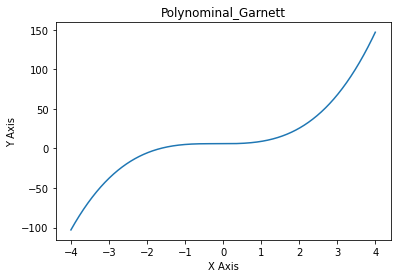

In [384]:
x = np.linspace(-4,4,1000)
z = np.linspace(-5, 5, 1000)

y = (x**2) + (z**3) + 6

plt.plot(x,y)
plt.title("Polynominal_Garnett")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")

plt.show()

<blockquote>2. Subplots</blockquote>

In [ ]:
# # Add a cell at the end to generate a plot using subplot2grid with the following characteristics:
# A 4 by 4 grid.

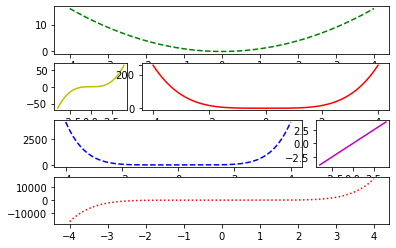

In [412]:
# On the first row plot the function x^2 in a dashed green line.
plt.subplot2grid((4,4), (0, 0), rowspan=1, colspan=4)
plt.plot(x, x**2,"g--")

# On the second-row plot two functions, the first function x^3 in yellow color and the second function x^4 spanning three columns in red color.
plt.subplot2grid((4,4), (1, 0))
plt.plot(x, x**3, 'y-')

plt.subplot2grid((4,4), (1, 1), colspan=3)
plt.plot(x, x**4, 'r-')


# On the third-row plot two functions the first X^6 in a dashed blue color and the second is X=x in magna (pink) color.
plt.subplot2grid((4,4), (2, 0), colspan=3)
plt.plot(x, x**6, 'b--')

plt.subplot2grid((4,4), (2, 3), colspan=1)
plt.plot(x, x,'m-')

# On the fourth row plot one function^7 spanning all columns in dotted red.
plt.subplot2grid((4,4), (3, 0), colspan=4)
plt.plot(x, x**7,'r:')

# Show Plot of Subplot 
plt.show()

<blockquote>Drawing text</blockquote>

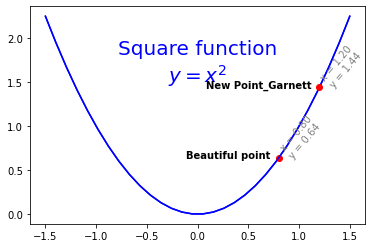

In [419]:
## On the first graph showing the beautiful point add a new point name new point _firstname and display the coordinates

x = np.linspace(-1.5, 1.5, 30)
px = 0.8
py = px**2

plt.plot(x, x**2, "b-", px, py, "ro")

plt.text(0, 1.5, "Square function\n$y = x^2$", fontsize=20, color='blue', horizontalalignment="center")

plt.text(px - 0.08, py, "Beautiful point", ha="right", weight="heavy")
plt.text(px, py, "x = %0.2f\ny = %0.2f"%(px, py), rotation=50, color='gray')

#New Point_Garnett
px2 = 1.20
py2 = px2**2

plt.plot(x, x**2, "b-", px2, py2, "ro")

plt.text(px2 - 0.08, py2, "New Point_Garnett", ha="right", weight="heavy")
plt.text(px2, py2, "x = %0.2f\ny = %0.2f"%(px2, py2), rotation=50, color='gray')

plt.show()

<blockquote>4. Scatter</blockquote>

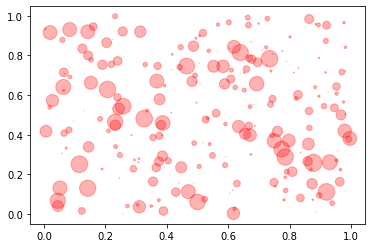

In [439]:
## Add a cell to generate a scatter plot of x and y where each contains 300 numbers generated randomly between 3 and 100. Set the scale, alpha and colors as you see suitable

from numpy.random import rand
x = rand(3, 100)
y = rand(3, 100)
scale = rand(3, 100)
scale = 300 * scale ** 5
plt.scatter(x, y, s=scale, alpha=0.3, color="red")
plt.show()